In [69]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("./ValeursFoncieres-2025-S1_nice.csv")#, on_bad_lines='skip')
df.head()

,Index,Valeur fonciere,Commune,Code departement,Section,Nombre de lots,Surface reelle bati,Nombre pieces principales
0,5,180000.0,MONTANGES,1,AC,0,0.893956,1.141705
1,20,183000.0,GEX,1,AH,1,-0.816196,-0.513578
2,27,131937.3,AMBERIEUX-EN-DOMBES,1,AC,1,-0.355771,-0.513578
3,29,173000.0,PONT-DE-VEYLE,1,A,1,0.597968,0.314063
4,50,414665.0,CHALLEX,1,B,2,0.236205,0.314063


In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf1', TfidfVectorizer(), 'Commune'),
        ('onehot1', OneHotEncoder(sparse_output=False, dtype=int), ['Section']),
    ],
    remainder='passthrough'  # Keep all other columns
)

df_x = df.drop(['Valeur fonciere'], axis=1)

X = preprocessor.fit_transform(df_x)
predictors = preprocessor.get_feature_names_out()
#print(predictors)

Y=df['Valeur fonciere']

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [72]:

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
#https://medium.com/@shanu9494/simple-linear-regression-using-rmse-as-cost-function-d5731da8dfa0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
linear_model.score(X_train, Y_train)

0.40458045469116155

In [73]:
linear_model.coef_
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

onehot1__Section_E   -124691.171378
tfidf1__commentry    -122441.063084
tfidf1__laon         -120891.823041
tfidf1__neris        -110880.880733
tfidf1__greoux        -98823.306724
                          ...      
tfidf1__gex           195027.358758
tfidf1__ornex         307634.742413
tfidf1__divonne       339390.125584
tfidf1__bellignat     347177.226376
tfidf1__embrun        429794.131983
Length: 481, dtype: float64


In [74]:
y_predict=linear_model.predict(x_test)

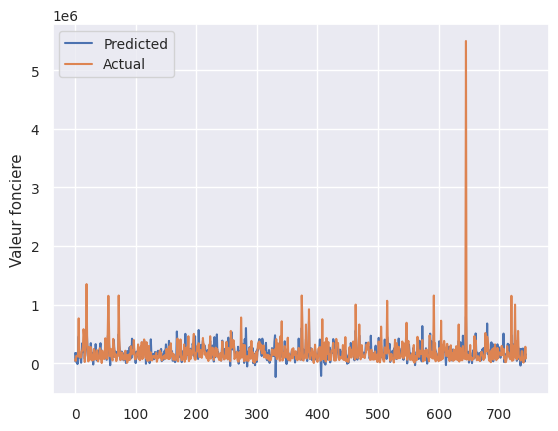

In [75]:
import matplotlib.pyplot as plt
plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Valeur fonciere')

plt.legend()
plt.show()

In [76]:
r_square = linear_model.score(x_test, y_test)
r_square

0.29497419689851345